# Notebook pour le tracé de l'évolution du front

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import scienceplots

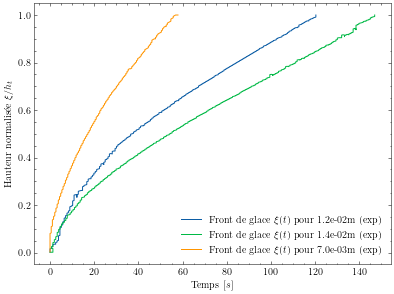

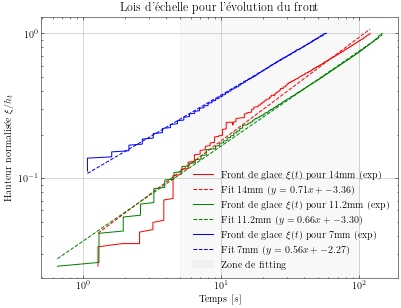

In [53]:
# Function to process image and extract contour data
def process_image(image_path, height_in_meters, length_in_time):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Erreur : l'image n'a pas été chargée. Vérifiez le chemin de l'image {image_path}.")
    
    flipped_image = cv2.flip(image, 0)
    height, width = flipped_image.shape
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)
    contour_x = contour[:, 0, 0]
    contour_y = height - contour[:, 0, 1]
    contour_y_meters = contour_y * height_in_meters / height
    contour_x_sec = contour_x * length_in_time / width
    
    return flipped_image, contour_x_sec, contour_y_meters

# Process each image and store the results
results = [
    process_image('Reslices obtenus/DSC_7059/DSC_7059.png', 0.012, 121),
    process_image('Reslices obtenus/DSC_7083/DSC_7083_binary.png', 0.014, 160),
    process_image('Reslices obtenus/DSC_7041/7041_binary.png', 0.007, 59)
]

# Courbe hauteur normalisé - temps
with plt.style.context('science'):
    plt.figure(figsize=[6.4, 4.8])
    for flipped_image, contour_x_sec, contour_y_meters in results:
        plt.plot(contour_x_sec[1:], contour_y_meters[1:] / max(contour_y_meters), label=f'Front de glace $\\xi(t)$ pour {max(contour_y_meters):.1e}m (exp)')
    plt.xlabel(r"Temps [$s$]")
    plt.ylabel(r'Hauteur normalisée  $\xi/h_t$')
    plt.legend()
    plt.savefig("Evolution_du_front_normalisée.svg")
    plt.show()

# Courbe log-log et régressiona affine
def log_fit(contour_x_sec, contour_y_meters, height_in_meters):
    log_x = np.log(contour_x_sec[5:])
    log_y = np.log((contour_y_meters / height_in_meters)[5:])
    fit = np.polyfit(log_x, log_y, 1)
    slope, intercept = fit
    fit_y = np.exp(intercept) * contour_x_sec[5:]**slope
    return slope, intercept, fit_y

fits = [log_fit(contour_x_sec, contour_y_meters, max(contour_y_meters)) for _, contour_x_sec, contour_y_meters in results]

# Plot log-log with fits
with plt.style.context('science'):
    plt.figure(figsize=[6.4, 4.8])
    colors = ['r-', 'g-', 'b-']
    labels = ['14mm', '11.2mm', '7mm']
    for (flipped_image, contour_x_sec, contour_y_meters), (slope, intercept, fit_y), color, label in zip(results, fits, colors, labels):
        plt.loglog(contour_x_sec[5:], (contour_y_meters / max(contour_y_meters))[5:], color, label=f'Front de glace $\\xi(t)$ pour {label} (exp)')
        plt.loglog(contour_x_sec[5:], fit_y, f'{color[0]}--', label=f'Fit {label} ($y={slope:.2f}x + {intercept:.2f}$)')
    
    plt.axvspan(5,100, label='Zone de fitting', alpha=0.05, color='gray')
    
    plt.grid()
    plt.xlabel(r"Temps [$s$]")
    plt.ylabel(r'Hauteur normalisée  $\xi/h_t$')
    plt.title("Lois d'échelle pour l'évolution du front")
    plt.legend()
    plt.savefig("Évolution_du_front_normalisée_log_log.svg")
    plt.show()



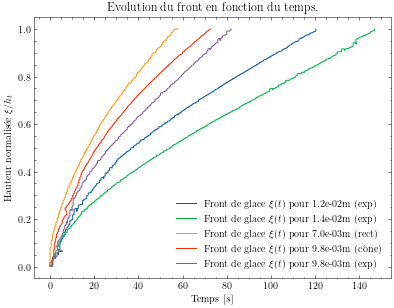

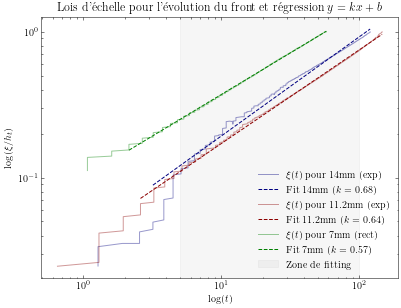

In [55]:
# Function to process image and extract contour data
def process_image_label(image_path, height_in_meters, length_in_time, type_):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Erreur : l'image n'a pas été chargée. Vérifiez le chemin de l'image {image_path}.")
    
    flipped_image = cv2.flip(image, 0)
    height, width = flipped_image.shape
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)
    contour_x = contour[:, 0, 0]
    contour_y = height - contour[:, 0, 1]
    contour_y_meters = contour_y * height_in_meters / height
    contour_x_sec = contour_x * length_in_time / width
    
    return flipped_image, contour_x_sec, contour_y_meters, type_

def process_image(image_path, height_in_meters, length_in_time):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Erreur : l'image n'a pas été chargée. Vérifiez le chemin de l'image {image_path}.")
    
    flipped_image = cv2.flip(image, 0)
    height, width = flipped_image.shape
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)
    contour_x = contour[:, 0, 0]
    contour_y = height - contour[:, 0, 1]
    contour_y_meters = contour_y * height_in_meters / height
    contour_x_sec = contour_x * length_in_time / width
    
    return flipped_image, contour_x_sec, contour_y_meters

# Process each image and store the results
results_label = [
    process_image_label('Reslices obtenus/DSC_7059/DSC_7059.png', 0.012, 121, 'exp'),
    process_image_label('Reslices obtenus/DSC_7083/DSC_7083_binary.png', 0.014, 160, 'exp'),
    process_image_label('Reslices obtenus/DSC_7041/7041_binary.png', 0.007, 59, 'rect'),
    process_image_label('Reslices obtenus/DSC_7070/7070_binary.png', 0.0098, 87, 'cône'),
    process_image_label('Reslices obtenus/DSC_7081/7081_binary.png', 0.0098, 95, 'exp')
]

results = [
    process_image('Reslices obtenus/DSC_7059/DSC_7059.png', 0.012, 121),
    process_image('Reslices obtenus/DSC_7083/DSC_7083_binary.png', 0.014, 160),
    process_image('Reslices obtenus/DSC_7041/7041_binary.png', 0.007, 59),
    process_image('Reslices obtenus/DSC_7070/7070_binary.png', 0.0098, 100)
    #process_image_label('Reslices obtenus/DSC_7081/7081_binary.png', 0.0098, 60+37, 'exp')
]

# Courbe hauteur normalisé - temps
with plt.style.context('science'):
    plt.figure(figsize=[6.4, 4.8])
    for flipped_image, contour_x_sec, contour_y_meters, type_ in results_label:
        plt.plot(contour_x_sec[1:], contour_y_meters[1:] / max(contour_y_meters), label=f'Front de glace $\\xi(t)$ pour {max(contour_y_meters):.1e}m ({type_})')
    plt.xlabel(r"Temps [$s$]")
    plt.ylabel(r'Hauteur normalisée  $\xi/h_t$')
    plt.legend()
    plt.title("Evolution du front en fonction du temps.")
    plt.savefig("Evolution_du_front_normalisée2.svg")
    plt.show()

# Courbe log-log et régressiona affine
def log_fit(contour_x_sec, contour_y_meters, height_in_meters):
    log_x = np.log(contour_x_sec[10:])
    log_y = np.log((contour_y_meters / height_in_meters)[10:])
    fit = np.polyfit(log_x, log_y, 1)
    slope, intercept = fit
    fit_y = np.exp(intercept) * contour_x_sec[10:]**slope
    return slope, intercept, fit_y

fits = [log_fit(contour_x_sec, contour_y_meters, max(contour_y_meters)) for _, contour_x_sec, contour_y_meters in results]

# Plot log-log with fits
with plt.style.context('science'):
    plt.figure(figsize=[6.4, 4.8])
    couleurs = ['navy', 'darkred', 'green', 'purple', 'orange']
    labels = ['14mm', '11.2mm', '7mm', '9.8mm']
    i = 0
    for (flipped_image, contour_x_sec, contour_y_meters, type_), (slope, intercept, fit_y), color, label in zip(results_label, fits, colors, labels):
        plt.loglog(contour_x_sec[5:], (contour_y_meters / max(contour_y_meters))[5:], color=couleurs[i%5], linestyle='-', label=f'$\\xi(t)$ pour {label} ({type_})', alpha=0.4)
        plt.loglog(contour_x_sec[10:], fit_y, linestyle='--', color=couleurs[i%5], label=f'Fit {label} ($k={slope:.2f}$)')
        i += 1
        
    plt.axvspan(5,100, label='Zone de fitting', alpha=0.1, color='darkgray')
    
    #plt.grid()
    plt.xlabel(r"$\log(t)$")
    plt.ylabel(r'$\log\left(\xi/h_t\right)$')
    plt.title("Lois d'échelle pour l'évolution du front et régression $y=kx+b$")
    plt.legend()
    plt.savefig("Evolution_du_front_normalisée_log_log2.svg")
    plt.show()



## Comparaison front théorique et expérimentale avec double normalisation

In [69]:
D = 1.203e-6

cp = 2060
L = 333e3

St = cp*110/L
print(St)

0.6804804804804805


36.31280863200705


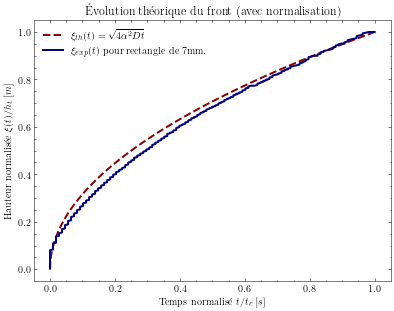

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.special import erf
import scienceplots

# Constants
B = St  # Example value, adjust as needed # Example value, adjust as needed

# Function to solve for alpha
def solve_alpha(B):
    def equation(alpha):
        return B - np.sqrt(np.pi) * alpha * np.exp(alpha**2) * erf(alpha)
    alpha_initial_guess = 1
    alpha_solution = fsolve(equation, alpha_initial_guess)
    return alpha_solution[0]

# Calculate alpha
alpha = solve_alpha(B)

# Theoretical curve h(t) = sqrt(4 * alpha**2 * D * t)
def h_theoretical(t, alpha, D):
    return np.sqrt(4 * alpha**2 * D * t)

# Determine the maximum time for which h(t) <= 0.007
h_max = 0.007
t_max = (h_max**2) / (4 * alpha**2 * D)

print(t_max)

# Generate time values for theoretical curve
time_values = np.linspace(0, t_max, 1000)
h_t_values = h_theoretical(time_values, alpha, D)

# Plot theoretical curve
with plt.style.context('science'):
    plt.figure(figsize=[6.4, 4.8])
    plt.plot(time_values/t_max, h_t_values/np.max(h_t_values), 'k--', label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$', linewidth=2, color='darkred')
    plt.plot(contour_x_sec[1:]/np.max(contour_x_sec), contour_y_meters[1:]/np.max(contour_y_meters), label=r'$\xi_{exp}(t)$ pour rectangle de $7$mm.', color='navy', linewidth=2)
    
    #plt.plot(time_values, h_t_values, 'k--', label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$', linewidth=2, color='darkred')
    #plt.plot(contour_x_sec[1:], contour_y_meters[1:], label=r'$\xi_{exp}(t)$ pour rectangle de $7$mm.', color='navy', linewidth=2)
    
    plt.ylabel(r"Hauteur normalisée $\xi(t)/h_t$ [$m$]")
    plt.xlabel(r'Temps normalisé $t/t_c$ [$s$]')
    plt.title("Évolution théorique du front (avec normalisation)")
    plt.legend()
    plt.savefig("Comparaison 1D et expérience_Normalisé.svg")
    plt.show()
